# Introduction to Linear regression using python

#### This blog is an attempt to introduce the concept of liner regression to software engineers. This is well understood and used in the community of data scientists and statisticans, but after arrival of big data boom it is now important for software engineer to understand it.

#### Basics Terminology and Loading data in a DataFrame


First of all I would like to explain the terminology. Following are most important before we dive in. 

-  **Observations**
-  **Features**
-  **Predictors**
-  **Target**
-  **Shape**
-  **Index Column**


In two dimensional array of Data - Rows are called observatoins and columns are called Features. One of the Feature which is being predicted is called Target. Other features which are used to predict the target is called predictors.

For linear regression to work - Primary condition is No of Target should be equal to no of Predictors i.e. Observations. 
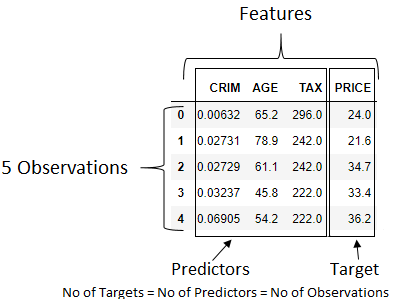

Shape is dimensionality, i.e. no of rows and columns. The shape of the data shown above is (5,4). 

Index column is the pointer which is used to identify the observation, it can be numeric or alpha-numberic. But generally it is numeric starting with 0.
***
Now we can look at the actual data. Here we will consider sample dataset available in scikit learn library. Following code loads data in python object boston.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

This dataset has 4 keys attribute called - data, feature_names, DESCR and target. data is a numpy 2-d array, feature_names and target is list. DESCR key explains the features available in the dataset.


In [2]:
print(boston.keys())
# print("===========================")
# print(boston.data)
# print("===========================")
# print(boston.feature_names)
# print("===========================")
# print(boston.DESCR)
# print("===========================")
# print(boston.target)



['data', 'feature_names', 'DESCR', 'target']


Let convert the boston object to Panda dataframe for easy navigation, slicing and dicing. Next cell is 

- First create instance of Panda as pd.
- Call the function DataFrame and pass boston.data and boston.feature_names keys.
- Print the a part of dataframe.

df.head would show the header (top) observations, Other way to select observation is using [] operator.

df.index evaluates to the index of the dataframe and "df.index<6" evaluates to True and False. df[df.index<6] is very popular way of selecting certain observation.

In [3]:
import pandas as pd
df = pd.DataFrame(boston.data,columns=boston.feature_names)
# df.head
df[df.index<6]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


There are three ways to slicing pandas dataframe, loc, iloc and ix. 

- iloc[index] : -  We can pass following elements in the dataframe.

            Index using number.
            Array indexes using [] operator.
            True False using functions or operators.
            
- loc[index] : -  We can pass following elements in the dataframe.

            Index using Labels.
            Array Labels using [] operator.
            True False using functions or operators.    
            
- ix[index] : -  We can pass anything numbers or Labels to ix.

             df.ix[[1,3,5],['CRIM','ZN']] selects 1st, 3rd and 5th row and two columns.

In [4]:
# df.loc[0:1]
# df.iloc[2,]
# df.ix[df.index<6,['CRIM','ZN']]
df.ix[[1,3,5],['CRIM','ZN']]



,CRIM,ZN
1,0.02731,0.0
3,0.03237,0.0
5,0.02985,0.0


We have created dataframe df with boston.data, it doesn't have target.

Now lets add boston.target as a column in the dataframe using df "df['PRICE'] = boston.target". This will add a feature(target) in the last column of the dataframe df, Print using ix notation.

The dataframe df is ready with boston data for regression analysis. Following cell prints the part of the dataframe using ix notation.

In [5]:
df['PRICE'] = boston.target
df.ix[[1,3,4],['AGE','DIS','PRICE']]

,AGE,DIS,PRICE
1,78.9,4.9671,21.6
3,45.8,6.0622,33.4
4,54.2,6.0622,36.2


#### Basics of Linear equation

So far we have loaded the features and target in the Pandas dataframe df. The last item added to the dataframe is PRICE, which our target.

We need to understand how the price is related to other predictors. The most intutive way to understand the relationship is scatter plot. So we will plot All the predictors against Price to observe their relationship.  

The selection of predictor is one of the important step in the regression analysis. The analyst should select the predictor which contributes to the target variable. There are some predictors which donot contribute to the relationship, those should be identified and not used in the regression equation. One obvious non-contributing predictor is constants. Here the predictor CHAS has value 0 or 1. it doesn't influences price of the house, so it should not be used in the regression.

I have selected RM,AGE and DIS as my predictor - I have taken this decision based on the observation in the scatter plot below.

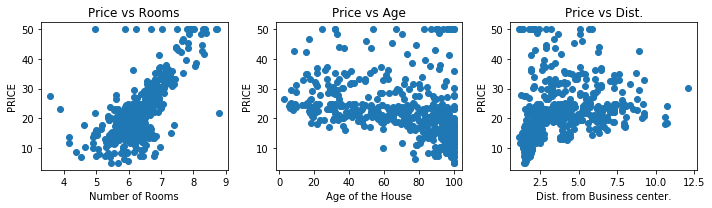

In [9]:
import matplotlib.pyplot as plt

# :Attribute Information (in order):
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

plt.subplots(1, 3,figsize=(10,3))

plt.subplot(1, 3, 1)
plt.scatter(df.ix[:,'RM'] ,df.ix[:,'PRICE'] )
plt.xlabel('Number of Rooms')
plt.ylabel('PRICE')
plt.title('Price vs Rooms')

plt.subplot(1, 3, 2)
plt.scatter(df.ix[:,'AGE'] ,df.ix[:,'PRICE'] )        
plt.xlabel('Age of the House')
plt.ylabel('PRICE')
plt.title('Price vs Age')

plt.subplot(1, 3, 3)
plt.scatter(df.ix[:,'DIS'] ,df.ix[:,'PRICE'] )        
plt.xlabel('Dist. from Business center.')
plt.ylabel('PRICE')
plt.title('Price vs Dist.')

plt.tight_layout()
plt.show()





We can observe a linear pattern in the plot. The price of house seems to be increasing with number of rooms. It is reducing with distance from the business center. And, It is reducing with Age.

We can try to find the equation (function) between No fo rooms and the price. The following cell plots the best fit line over the scatter plot. The red line is the line of best fit and it can predict the house price based on the number of rooms. The equation of the line is given in the chart.

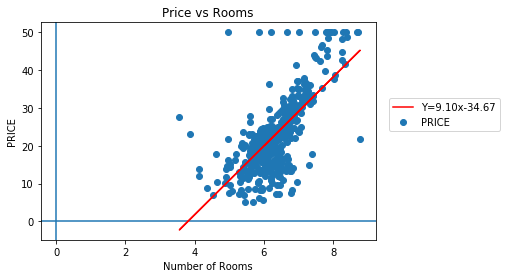

In [7]:
import numpy as np

X = df.ix[:,'RM']  
Y = df.ix[:,'PRICE']

fit = np.polyfit(X,Y, deg=1)
 
plt.scatter(X ,Y )
plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel('Number of Rooms')
plt.ylabel('PRICE')
plt.title('Price vs Rooms')
equ = "Y=%2.2fx%2.2f" %(fit[0],fit[1])

plt.plot(X, fit[0] * X + fit[1], color='red',label=equ)
plt.legend(loc=(1.04,0.5))


plt.show()



There are number of properties associated with the best fit line. 

One of the most important properties is Pearson product-moment correlation coefficient (PPMCC) or simply said correlation coefficient.

It gives direction of the  linear correlation between two variables X and Y. The value lies between -1 to +1. A value closer to +1, i.e. 0.95 suggests very strong positive correlation. A value closer to -1 suggest negative correlation. A negative correlation means that the value of dependent variable would decrease with increasing independent variable. A value 0 suggests that there is no correlation between the variables.

Mathematically  r is given by below formula.

                   r = Covariance of (X,Y) / Stadard Deviation of x * Standard Deviation of y 

Some of Important properties are 
                   
                   R-suqared
                   Adjusted. R-squared
                   F Statistic
                   Prob ( F Statistic)
                   Standard Error
                   t Ratio
                   p
- R-Squared is said to be the Coefficient of determination, it signifys the strength of the relationship between variable in    terms of percentage. This is actually the proportion of the variance in the dependent variable that can be explained by  independent variable. The higher value of R-Squared is considered to be good. But this is not always true, sometimes non-contributing predictors inflate the R-Squared. 
  
  
  
- The adjusted R-squared is a modified version of R-Squared that has been adjusted for the number of predictors in the model. The adjusted R-squared  increases only if new term improves the model more than would be expected by chance. It decreases when predictor improves the model by less than expected by chance. The adjusted R-square can be negative, but usually not. It is always less than equal to R-squared.



- 'F Statistic' or 'F Value' is the measure of the overall significance of the regression model. 'F critical value' is the value obtained from F table for a given significance level (α). 



- F value, F Critical Value , Alpha (α) and p value should always be looked togather to understand the overall significance of the regression model.



- If F value is greater than F Critical value, it suggests that there is some significance predictor in the model.



- While p value less then α suggests all the predictors are significant.



- Mathematically F value is the ratio of the mean regression sum of squares divided by the mean error sum of squares.  Its value will range from zero to an arbitrarily large number.  The value of Prob(F Statistic) is the probability that the null hypothesis for the full model is true (i.e., that all of the regression coefficients are zero).



- Basically, the f-test compares the model with zero predictor variables (the intercept only model), and decides whether the added coefficients improves the model. If we get a significant result, then whatever coefficients is included in the model is considered to be fit for the model.


- Standard Error is the measure of the accuracy of predictions. If the prediction done by the model (equation) is close to the actual value,i.e. in the scatter plot the sample values are very close to the line of best fit. The model is considered to be more accurate. 

- Mathematically the standard error (σest) is given by 
                     
               σest = Sqrt( SUM (Sqr(Yi - Y′)) / N )
               
               
- t statistic is the measure of significane of the individual predictor.


Following cell uses python library statsmodels.api to show the summary output of the OLS (Ordinary Least Square) method. The explanations given in thie cell can be used to interpret the result.

Regression is a vast topic which can be covered in books only. I have found a book at the link https://www.stat.berkeley.edu/~brill/Stat131a/29_multi.pdf.  This looks to be a nice read.

                 


In [8]:
import statsmodels.api as sm
results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           2.49e-74
Time:                        12:05:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0